<a href="https://colab.research.google.com/github/dpk-a7/Deep-learning/blob/main/TextHero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy

In [3]:
df = pd.read_csv("Restaurant_Reviews.tsv", sep='\t')

In [5]:
df.shape

(1000, 2)

In [8]:
df.head(4)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1


In [9]:
data = deepcopy(df)

In [10]:
!pip install texthero

     |████████████████████████████████| 245kB 7.9MB/s 
     |████████████████████████████████| 1.5MB 38.8MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [11]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
hero.top_words(data["Review"]) 

the           406
and           382
was           295
I             295
a             228
             ... 
highlights      1
handled         1
groups          1
juice           1
gets            1
Name: Review, Length: 2382, dtype: int64

In [14]:
hero.top_words(data["Review"].pipe(hero.clean))#remove stop words

food          126
place         106
good           95
service        85
great          70
             ... 
restaraunt      1
finger          1
gooodd          1
prepared        1
plantains       1
Name: Review, Length: 1888, dtype: int64

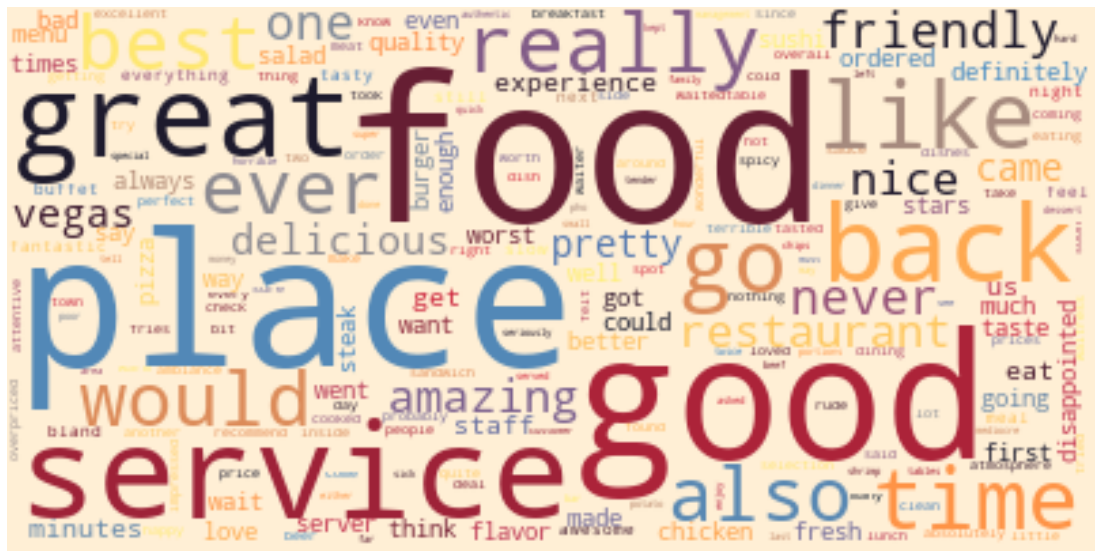

In [16]:
#wordCloud
hero.wordcloud(data["Review"].pipe(hero.clean))

In [17]:
#piping
data['pca'] = (
    data["Review"]
    .pipe(hero.clean)
    .pipe(hero.tfidf)#term frequency
    .pipe(hero.pca)
)

In [24]:
hero.scatterplot(data, 'pca',color = 'Liked' , title="PCA Reviews")

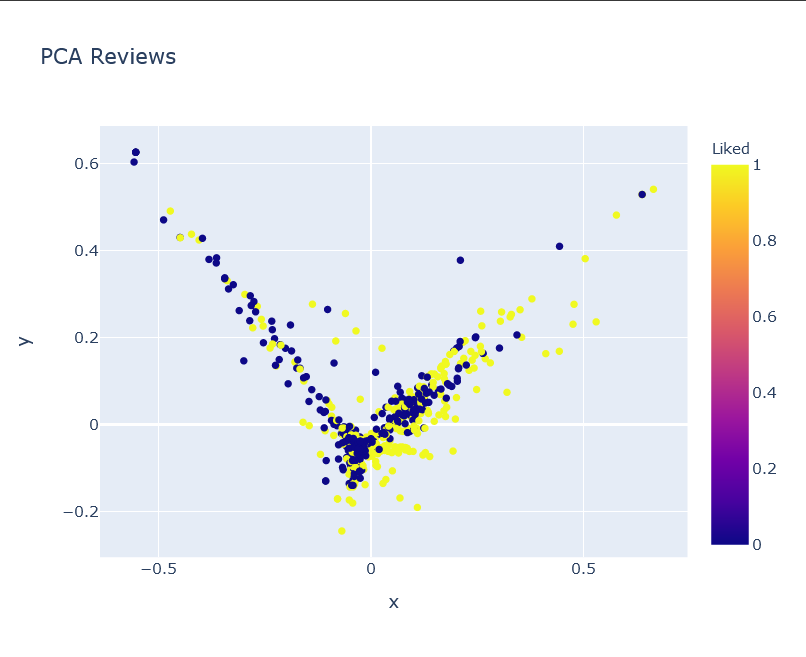